# 11장 심층 신경망 훈련하기

### 11.1 그레이디언트 소실과 폭주 문제

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras


케라스는 기본적으로 균등분포의 글로럿 초기화를 사용함. 다음과 같이 층을 만들 때
kernel_initializer = "he_uniform"이나 kernel_initializer = "he_normal"로 바꾸어 He 초기화 사용

In [ ]:
keras.layers.Dense(10, activation='relu', kernel_initializer = 'he_normal')

$fan_{in}$ 대신 $fan_{out}$ 기반의 균등분포 He 초기화를 사용하고 싶다면 다음과 같이 Variance Scaling을 사용할 수 있다.

In [ ]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")

keras.layers.Dense(10, activation='sigmoid', kernel_initializer=he_avg_init)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
# LeakyReLU 활성화 함수 사용
import numpy as np
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss=  "sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(lr = 1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.6314 - accuracy: 0.5054 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8416 - accuracy: 0.7247 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7053 - accuracy: 0.7637 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6325 - accuracy: 0.7908 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5992 - accuracy: 0.8021 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5624 - accuracy: 0.8142 - val_loss: 0.5350 - val_accuracy: 0.8236
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5379 - accuracy: 0.8218 - val_loss: 0.5157 - val_accuracy:

### 11.1.3 배치 정규화  

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(300, activation="elu", kernel_initializer='he_normal'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(100, activation="elu", kernel_initializer='he_normal'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 784)               3136      
_________________________________________________________________
dense_17 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_9 (Batch (None, 300)               1200      
_________________________________________________________________
dense_18 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100)               400       
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

In [ ]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization_8/gamma:0', True),
 ('batch_normalization_8/beta:0', True),
 ('batch_normalization_8/moving_mean:0', False),
 ('batch_normalization_8/moving_variance:0', False)]

In [ ]:
model.layers[1].updates

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:1402: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


[]

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.1362 - accuracy: 0.6205 - val_loss: 0.5871 - val_accuracy: 0.8042
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6230 - accuracy: 0.7884 - val_loss: 0.5074 - val_accuracy: 0.8308
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5563 - accuracy: 0.8071 - val_loss: 0.4746 - val_accuracy: 0.8400
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5178 - accuracy: 0.8203 - val_loss: 0.4526 - val_accuracy: 0.8458
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5013 - accuracy: 0.8240 - val_loss: 0.4378 - val_accuracy: 0.8496
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4774 - accuracy: 0.8335 - val_loss: 0.4262 - val_accuracy: 0.8542
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4675 - accuracy: 0.8371 - val_loss: 0.4159 - val_ac

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(300, use_bias=False),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Activation('relu'),
                                 keras.layers.Dense(100, use_bias=False),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Activation('relu'),
                                 keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs=10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.4003 - accuracy: 0.5431 - val_loss: 0.6680 - val_accuracy: 0.7886
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7095 - accuracy: 0.7719 - val_loss: 0.5537 - val_accuracy: 0.8212
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6134 - accuracy: 0.7976 - val_loss: 0.4996 - val_accuracy: 0.8350
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5561 - accuracy: 0.8140 - val_loss: 0.4655 - val_accuracy: 0.8460
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5289 - accuracy: 0.8219 - val_loss: 0.4420 - val_accuracy: 0.8508
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4972 - accuracy: 0.8286 - val_loss: 0.4238 - val_accuracy: 0.8538
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4779 - accuracy: 0.8357 - val_loss: 0.4103 - val_ac

### 11.1.4 그레이디언트 클리핑 

그레이디언트 폭주 문제를 완화하는 인기 있는 다른 방법은 역전파될 때 일정 임곗값을 넘어서지 못하게 그레이디언트를 잘라내 것이다.

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer= optimizer)

In [ ]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## 11.2 사전훈련된 층 재사용하기 

### 11.2.1 케라스를 사용한 전이 학습 


패션 MNIST 훈련 세트를 두 개로 나누어 보죠:
* `X_train_A`: 샌달과 셔츠(클래스 5와 6)을 제외한 모든 이미지
* `X_train_B`: 샌달과 셔츠 이미지 중 처음 200개만 가진 작은 훈련 세트

검증 세트와 테스트 세트도 이렇게 나눕니다. 하지만 이미지 개수는 제한하지 않습니다.

A 세트(8개의 클래스를 가진 분류 문제)에서 모델을 훈련하고 이를 재사용하여 B 세트(이진 분류)를 해결해 보겠습니다. A 작업에서 B 작업으로 약간의 지식이 전달되기를 기대합니다. 왜냐하면 A 세트의 클래스(스니커즈, 앵클 부츠, 코트, 티셔츠 등)가 B 세트에 있는 클래스(샌달과 셔츠)와 조금 비슷하기 때문입니다. 하지만 `Dense` 층을 사용하기 때문에 동일한 위치에 나타난 패턴만 재사용할 수 있습니다(반대로 합성곱 층은 훨씬 많은 정보를 전송합니다. 학습한 패턴을 이미지의 어느 위치에서나 감지할 수 있기 때문입니다. CNN 장에서 자세히 알아 보겠습니다).


In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
X_train_A.shape

(43986, 28, 28)

In [ ]:
X_train_B.shape

(200, 28, 28)

In [ ]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [ ]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [ ]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50 ,50):
  model_A.add(keras.layers.Dense(n_hidden, activation = "selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [ ]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data = (X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.8601 - accuracy: 0.7254 - val_loss: 0.3814 - val_accuracy: 0.8660
Epoch 2/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3731 - accuracy: 0.8740 - val_loss: 0.3212 - val_accuracy: 0.8891
Epoch 3/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3194 - accuracy: 0.8908 - val_loss: 0.2932 - val_accuracy: 0.9001
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3028 - accuracy: 0.8955 - val_loss: 0.2789 - val_accuracy: 0.9041
Epoch 5/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2837 - accuracy: 0.9017 - val_loss: 0.2677 - val_accuracy: 0.9083
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2697 - accuracy: 0.9072 - val_loss: 0.2614 - val_accuracy: 0.9116
Epoch 7/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2628 - accuracy: 0.9105 - val_loss: 0.2608 - val_accuracy:

In [ ]:
model_A.save("my_model_A.h5")

In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
  model_B.add(keras.layers.Dense(n_hidden, activation="selu"))

model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_B.compile(loss=  'binary_crossentropy',
                optimizer =keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [ ]:
history=model_B.fit(X_train_B, y_train_B, epochs=20,
                    validation_data = (X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 49ms/step - loss: 0.9198 - accuracy: 0.4733 - val_loss: 0.6258 - val_accuracy: 0.6359
Epoch 2/20
7/7 [==============================] - 0s 19ms/step - loss: 0.5833 - accuracy: 0.7169 - val_loss: 0.4965 - val_accuracy: 0.8185
Epoch 3/20
7/7 [==============================] - 0s 20ms/step - loss: 0.4605 - accuracy: 0.8901 - val_loss: 0.4278 - val_accuracy: 0.8763
Epoch 4/20
7/7 [==============================] - 0s 49ms/step - loss: 0.4159 - accuracy: 0.8915 - val_loss: 0.3786 - val_accuracy: 0.9067
Epoch 5/20
7/7 [==============================] - 0s 19ms/step - loss: 0.3614 - accuracy: 0.9259 - val_loss: 0.3397 - val_accuracy: 0.9351
Epoch 6/20
7/7 [==============================] - 0s 19ms/step - loss: 0.3282 - accuracy: 0.9506 - val_loss: 0.3081 - val_accuracy: 0.9452
Epoch 7/20
7/7 [==============================] - 0s 18ms/step - loss: 0.2762 - accuracy: 0.9728 - val_loss: 0.2837 - val_accuracy: 0.9554
Epoch 8/20
7/7 [===========

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 784)               3136      
_________________________________________________________________
dense_20 (Dense)             (None, 300)               235200    
_________________________________________________________________
batch_normalization_12 (Batc (None, 300)               1200      
_________________________________________________________________
activation_3 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               30000     
_________________________________________________________________
batch_normalization_13 (Batc (None, 100)              

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

model_B_on_A.compile(loss = 'binary_crossentropy',
                     optimizer = keras.optimizers.SGD(lr = 1e-3),
                     metrics=['accuracy'])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data = (X_valid_B, y_valid_B)
                        )

for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data = (X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 44ms/step - loss: 0.3496 - accuracy: 0.8627 - val_loss: 0.3503 - val_accuracy: 0.8621
Epoch 2/4
7/7 [==============================] - 0s 17ms/step - loss: 0.3278 - accuracy: 0.9008 - val_loss: 0.3320 - val_accuracy: 0.8793
Epoch 3/4
7/7 [==============================] - 0s 17ms/step - loss: 0.3382 - accuracy: 0.8984 - val_loss: 0.3155 - val_accuracy: 0.8905
Epoch 4/4
7/7 [==============================] - 0s 18ms/step - loss: 0.2802 - accuracy: 0.9322 - val_loss: 0.2997 - val_accuracy: 0.8986
Epoch 1/16
7/7 [==============================] - 1s 47ms/step - loss: 0.2498 - accuracy: 0.9406 - val_loss: 0.1951 - val_accuracy: 0.9594
Epoch 2/16
7/7 [==============================] - 0s 18ms/step - loss: 0.1611 - accuracy: 0.9779 - val_loss: 0.1575 - val_accuracy: 0.9696
Epoch 3/16
7/7 [==============================] - 0s 19ms/step - loss: 0.1448 - accuracy: 0.9715 - val_loss: 0.1377 - val_accuracy: 0.9767
Epoch 4/16
7/7 [===============

In [ ]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9825


[0.13373036682605743, 0.9825000166893005]

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0560 - accuracy: 0.9940


[0.055987656116485596, 0.9940000176429749]

# 12장 텐서플로를 사용한 사용자 정의 모델과 훈련

In [ ]:
import tensorflow as tf
from tensorflow import keras

def init(self)의 괄호 안에 들어가는 변수는 모두 정의 해주어야한다.

super().init()의 괄호 안에서 정의하는 변수는 부모 클래스에서 정의해야 하는 변수들을 넣어줘야한다.

$*$args는 tuple 형태로, $**$kwargs는 dictionary 형태로 변수들을 저장해준다. 둘 중 하나만 쓸 경우 그에 맞게 변수들을 통과시켜 주지 않으면 에러 super().init() super(ClassName, self).init() 둘 다 같다.

In [ ]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

NameError: ignored

In [ ]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

# 14장 - 합성곱 신경망을 사용한 컴퓨터 비전 

In [ ]:
from sklearn.datasets import load_sample_image
import numpy as np

china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([china, flower])

print(china.shape)
print(flower.shape)
print(images.shape)

(427, 640, 3)
(427, 640, 3)
(2, 427, 640, 3)


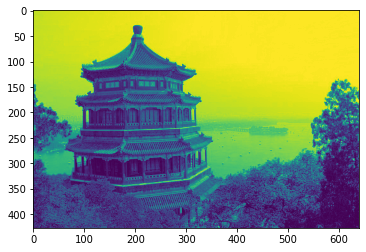

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(china[:, :, 2])

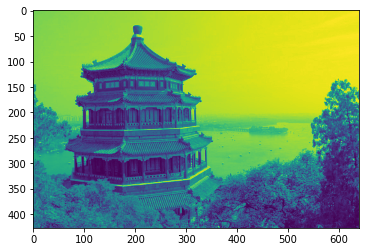

In [ ]:
plt.imshow(china[:, :, 1])

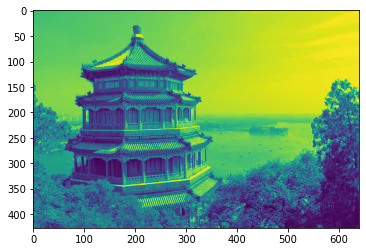

In [ ]:
plt.imshow(china[:, :, 0])

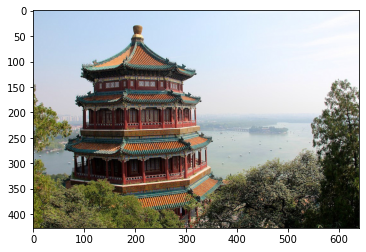

In [ ]:
plt.imshow(china)

In [ ]:
filters = np.zeros(shape=(7,7,3,2), dtype = np.float32)
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

In [ ]:
filters[:, 3, :, 0] = 1 # 수직선
filters[3, :, :, 1] = 1 # 수평선
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

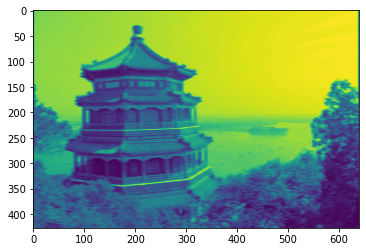

In [ ]:
import tensorflow as tf

outputs = tf.nn.conv2d(images, filters, strides =1, padding = "SAME")
plt.imshow(outputs[0, :, :, 1])
plt.show()

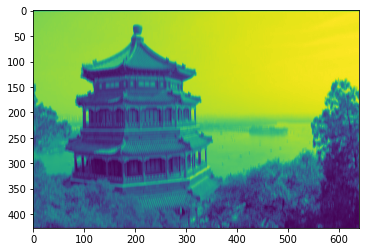

In [ ]:
plt.imshow(outputs[0, :, :, 0])
plt.show()

In [ ]:
outputs.shape

TensorShape([2, 427, 640, 2])

In [ ]:
from tensorflow import keras
max_pool = keras.layers.MaxPool2D(pool_size = 2)


In [ ]:
def crop(images):
    return images[150:220, 130:250]

In [ ]:
cropped_images = np.array([crop(image) for image in images], dtype = np.float32)
output = max_pool(cropped_images)
#cropped_images

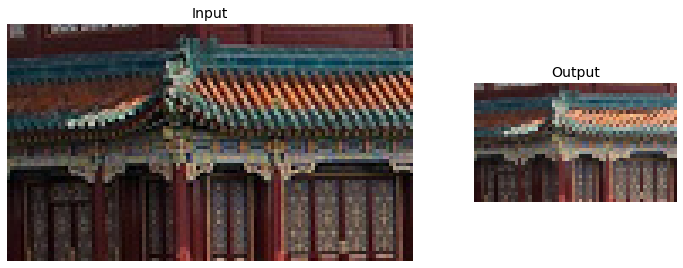

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize = (12, 8))
gs = mpl.gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios = [2, 1])

ax1 = fig.add_subplot(gs[0,0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])
ax2.axis('off')
plt.show()

In [ ]:
class DepthMaxPool(keras.layers.Layer):
  def __init__(self, pool_size, strides=None, padding ="VALID", **kwargs):
    super().__init__(**kwargs)
    if strides is None:
      strides = pool_size
    self.pool_size = pool_size
    self.strides = strides
    self.padding = padding
  
  def call(self, inputs):
    return tf.nn.max_pool(inputs,
                          ksize = (1, 1, 1, self.pool_size),
                          strides = (1, 1, 1, self.pool_size),
                          padding = self.padding)

In [ ]:

print(cropped_images.shape)
depth_pool = DepthMaxPool(3)
depth_output = depth_pool(cropped_images)
depth_output.shape


(2, 70, 120, 3)


TensorShape([2, 70, 120, 1])

In [ ]:
# or just use a Lambda layer

depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(
    X, ksize = (1, 1, 1, 3), strides = (1, 1, 1, 3), padding = "VALID"
))

depth_output = depth_pool(cropped_images)
depth_output.shape

TensorShape([2, 70, 120, 1])

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

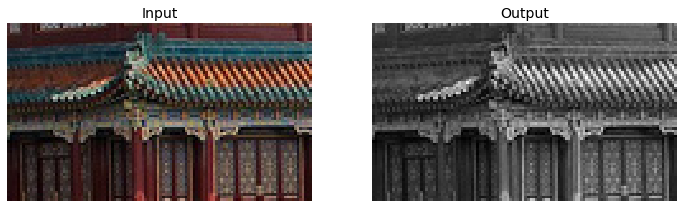

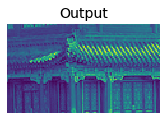

In [ ]:
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plt.title("Input", fontsize = 14)
plot_color_image(cropped_images[0])
                 
plt.subplot(1, 2, 2)
plt.title("Output", fontsize = 14)
plot_image(depth_output[0, ..., 0])
plt.show()

plt.subplot(2, 2, 1)
plt.title("Output", fontsize = 14)
plot_color_image(depth_output[0, ..., 0])
plt.show()



In [ ]:
depth_output

<tf.Tensor: shape=(2, 70, 120, 1), dtype=float32, numpy=
array([[[[0.26666668],
         [0.42745098],
         [0.39607844],
         ...,
         [0.4862745 ],
         [0.3529412 ],
         [0.53333336]],

        [[0.2901961 ],
         [0.46666667],
         [0.38431373],
         ...,
         [0.49019608],
         [0.36862746],
         [0.4       ]],

        [[0.24313726],
         [0.49803922],
         [0.4392157 ],
         ...,
         [0.47843137],
         [0.3647059 ],
         [0.36078432]],

        ...,

        [[0.12941177],
         [0.1254902 ],
         [0.12941177],
         ...,
         [0.14901961],
         [0.16078432],
         [0.14901961]],

        [[0.10980392],
         [0.13725491],
         [0.14901961],
         ...,
         [0.11372549],
         [0.12941177],
         [0.1254902 ]],

        [[0.11764706],
         [0.1254902 ],
         [0.16470589],
         ...,
         [0.15294118],
         [0.1254902 ],
         [0.13725491]]],


   

In [ ]:
depth_output[0, ..., 0]

<tf.Tensor: shape=(70, 120), dtype=float32, numpy=
array([[0.26666668, 0.42745098, 0.39607844, ..., 0.4862745 , 0.3529412 ,
        0.53333336],
       [0.2901961 , 0.46666667, 0.38431373, ..., 0.49019608, 0.36862746,
        0.4       ],
       [0.24313726, 0.49803922, 0.4392157 , ..., 0.47843137, 0.3647059 ,
        0.36078432],
       ...,
       [0.12941177, 0.1254902 , 0.12941177, ..., 0.14901961, 0.16078432,
        0.14901961],
       [0.10980392, 0.13725491, 0.14901961, ..., 0.11372549, 0.12941177,
        0.1254902 ],
       [0.11764706, 0.1254902 , 0.16470589, ..., 0.15294118, 0.1254902 ,
        0.13725491]], dtype=float32)>

In [ ]:
A = np.array([[[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]], [1, 2, 3], [3, 4, 5]
               ,[6, 7, 8], [1, 2, 3]]])
print(A[0, ... ,0])


[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
avg_pool = keras.layers.AvgPool2D(pool_size = 2)

In [ ]:
output_avg = avg_pool(cropped_images)

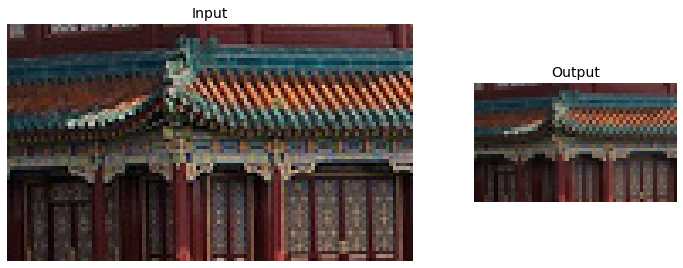

In [ ]:
# averages pooling
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_avg[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

tf.Tensor(
[[0.2788801  0.22507527 0.20967631]
 [0.51287866 0.4595188  0.3342377 ]], shape=(2, 3), dtype=float32)


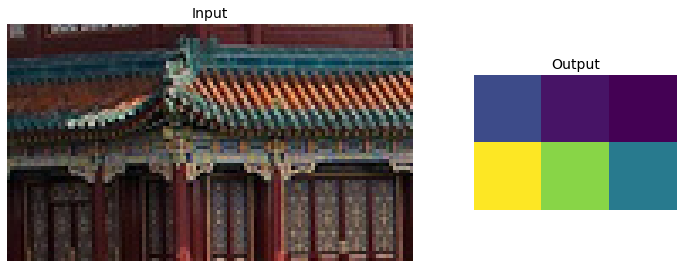

In [ ]:
# global average pooling
global_avg_pool = keras.layers.GlobalAvgPool2D()
output_global = global_avg_pool(cropped_images)

print(output_global)

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_global)  # plot the output for the 1st image
ax2.axis("off")
plt.show()


In [ ]:
# Solving the problem of Fashion MNIST with a CNN

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation = "relu", padding = "same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding = "same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding = "same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding = "same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding = "same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis = 0, keepdims = True)
X_std = X_train.std(axis = 0, keepdims = True) + 1e-7

X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# newaxis란, https://azanewta.tistory.com/m/3

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = 'nadam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))
score = model.evaluate(X_test, y_test)
x_new = X_test[:10] 
y_pred = model.predict(X_new)

Epoch 1/10
  29/1719 [..............................] - ETA: 6:34 - loss: 2.2532 - accuracy: 0.1601

KeyboardInterrupt: ignored

googlenet
- https://ikkison.tistory.com/m/86
- https://m.blog.naver.com/PostView.nhn?blogId=laonple&logNo=220692793375&proxyReferer=https:%2F%2Fm.blog.naver.com%2Flaonple%2F220686328027

# 15장 RNN과 CNN을 사용해 시퀀스 처리하기

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt

np.random.seed(42)
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time-offsets1) * (freq1 * 10 + 10)) # wave1
  series += 0.2 * np.sin((time-offsets2) * (freq2 * 20 + 20)) # + wave2
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
  return series[..., np.newaxis].astype(np.float32)


n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1] # train 70%
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1] # valid 20%
X_test, y_test = series[9000:, :n_steps], series[9000:, -1] # test 10%

y_pred = X_valid[:,-1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))


0.020211367

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape = (50, 1))) # 입력마다 1차원 특성 배열
model.add(keras.layers.Dense(1))

model.compile(Adam(learning_rate=0.001), loss = 'mse', metrics=["mean_squared_error"]) # accuracy를 사용하는거는 분류문제에 해당하므로 0이 나옴
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=20)

model.evaluate(X_valid, y_valid)

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.1398 - mean_squared_error: 0.1398 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 7/20
219/219 [========

[0.004168086685240269, 0.004168086685240269]

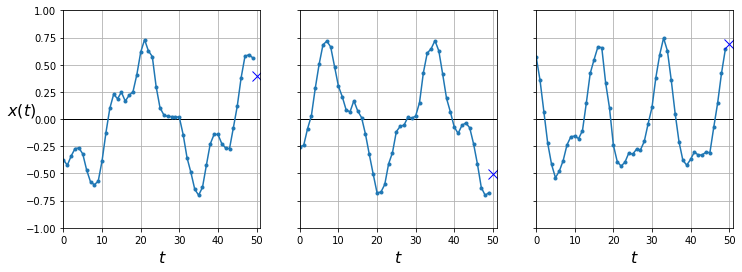

In [ ]:
def plot_series(series, y=None, y_pred = None, x_label = "$t$", y_label="$x(t)$"):
  plt.plot(series, ".-")
  if y is not None:
    plt.plot(n_steps, y, "bx", markersize=10)
  if y_pred is not None:
    plt.plot(n_steps, y_pred, "ro")
  plt.grid(True)
  if x_label:
    plt.xlabel(x_label, fontsize=16)
  if y_label:
    plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.hlines(0, 0, 100, linewidth=1)
  plt.axis([0, n_steps+1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))

for col in range(3):
  plt.sca(axes[col])
  plot_series(X_valid[col, :, 0], y_valid[col, 0],
              y_label = ("$x(t)$" if col ==0 else None))

plt.show()

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1])       ,                        
    keras.layers.SimpleRNN(20, return_sequences=True)                               ,
    keras.layers.SimpleRNN(1)                       

])

model.compile(loss = "mse", optimizer = "adam")
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 7s 24ms/step - loss: 0.0256 - val_loss: 0.0039
Epoch 2/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 4/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 7/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 8/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 9/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 10/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0027 - val_lo

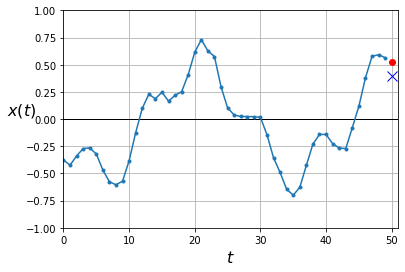

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

# 16장 - RNN과 어텐션을 사용한 자연어 처리

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import sklearn
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

shakespeare_url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
filepath = keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()


1122304/1115394 [==============================] - 0s 0us/step
